This work is licensed under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Classes and objects

At this point you know how to use functions to organize code and built-in types to organize
data. The next step is to learn “object-oriented programming”, which uses programmer-defined
types to organize both code and data. Object-oriented programming is a big topic;
it will take a few chapters to get there.

Code examples from this chapter are available from http://thinkpython2.com/code/
Point1.py; solutions to the exercises are available from http://thinkpython2.com/code/
Point1_soln.py.


### 15.1 Programmer-defined types

We have used many of Python’s built-in types; now we are going to define a new type. As
an example, we will create a type called Point that represents a point in two-dimensional
space.

In mathematical notation, points are often written in parentheses with a comma separating
the coordinates. For example, (0, 0) represents the origin, and (x, y) represents the point x
units to the right and y units up from the origin.

There are several ways we might represent points in Python:

- We could store the coordinates separately in two variables, x and y.

- We could store the coordinates as elements in a list or tuple.

- We could create a new type to represent points as objects.

Creating a new type is more complicated than the other options, but it has advantages that
will be apparent soon.

A programmer-defined type is also called a **class**. A class definition looks like this:

In [ ]:
class Point:
    """Represents a point in 2-D space."""

The header indicates that the new class is called Point. The body is a docstring that explains
what the class is for. You can define variables and methods inside a class definition,
but we will get back to that later.

Defining a class named Point creates a **class object**.

In [ ]:
Point

Because Point is defined at the top level, its “full name” is \_\_main\_\_.Point.
The class object is like a factory for creating objects. To create a Point, you call Point as if it
were a function.

In [ ]:
blank = Point()
blank

The return value is a reference to a Point object, which we assign to blank.
Creating a new object is called **instantiation**, and the object is an **instance** of the class.
When you print an instance, Python tells you what class it belongs to and where it is stored
in memory (the prefix 0x means that the following number is in hexadecimal).

Every object is an instance of some class, so “object” and “instance” are interchangeable.
But in this chapter “instance” is used to indicate that we are talking about a programmer-defined
type.


### 15.2 Attributes

You can assign values to an instance using dot notation:

In [ ]:
blank.x = 3.0
blank.y = 4.0

This syntax is similar to the syntax for selecting a variable from a module, such as math.pi
or string.whitespace. In this case, though, we are assigning values to named elements of
an object. These elements are called **attributes**.

As a noun, “AT-trib-ute” is pronounced with emphasis on the first syllable, as opposed to
“a-TRIB-ute”, which is a verb.

The following diagram shows the result of these assignments. A state diagram that shows
an object and its attributes is called an object diagram; see Figure 15.1.
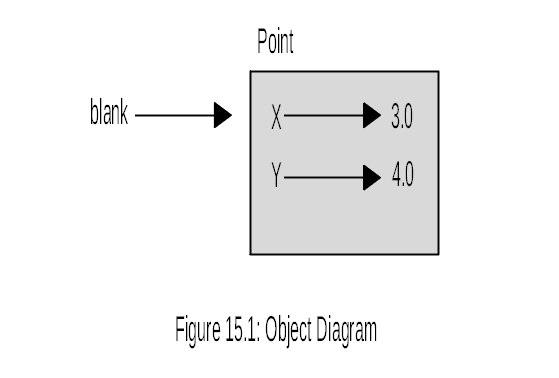
The variable blank refers to a Point object, which contains two attributes. Each attribute
refers to a floating-point number.

You can read the value of an attribute using the same syntax:

In [ ]:
blank.x

In [ ]:
blank.y

The expression blank.x means, “Go to the object blank refers to and get the value of x.” In
the example, we assign that value to a variable named x. There is no conflict between the
variable x and the attribute x.

You can use dot notation as part of any expression. For example:

In [ ]:
'(%3.1f, %3.1f)' % (blank.x, blank.y)

In [ ]:
import math
distance = math.sqrt(blank.x**2 + blank.y**2)
distance

You can pass an instance as an argument in the usual way. For example:

In [ ]:
def print_point(p):
    print('(%3.1f, %3.1f)' % (p.x, p.y))

print_point takes a point as an argument and displays it in mathematical notation. To
invoke it, you can pass blank as an argument:

In [ ]:
print_point(blank)

Inside the function, p is an alias for blank, so if the function modifies p, blank changes.
As an exercise, write a function called distance_between_points that takes two Points as
arguments and returns the distance between them.


### 15.3 Rectangles

Sometimes it is obvious what the attributes of an object should be, but other times you have
to make decisions. For example, imagine you are designing a class to represent rectangles.
What attributes would you use to specify the location and size of a rectangle? You can ignore
angle; to keep things simple, assume that the rectangle is either vertical or horizontal.
There are at least two possibilities:

- You could specify one corner of the rectangle (or the center), the width, and the height.

- You could specify two opposing corners.

At this point it is hard to say whether either is better than the other, so we’ll implement the
first one, just as an example.

Here is the class definition:

In [ ]:
class Rectangle:
    """Represents a rectangle.
    attributes: width, height, corner.
    """

The docstring lists the attributes: width and height are numbers; corner is a Point object
that specifies the lower-left corner.

To represent a rectangle, you have to instantiate a Rectangle object and assign values to the
attributes:

In [ ]:
box = Rectangle()
box.width = 100.0
box.height = 200.0
box.corner = Point()
box.corner.x = 0.0
box.corner.y = 0.0

The expression box.corner.x means, “Go to the object box refers to and select the attribute
named corner; then go to that object and select the attribute named x.”
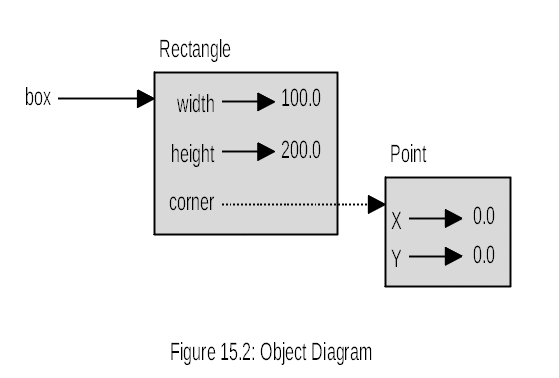
Figure 15.2 shows the state of this object. An object that is an attribute of another object is
**embedded**.


### 15.4 Instances as return values

Functions can return instances. For example, find_center takes a Rectangle as an argument
and returns a Point that contains the coordinates of the center of the Rectangle:

In [ ]:
def find_center(rect):
    p = Point()
    p.x = rect.corner.x + rect.width/2
    p.y = rect.corner.y + rect.height/2
    return p

Here is an example that passes box as an argument and assigns the resulting Point to
center:

In [ ]:
center = find_center(box)
print_point(center)

### 15.5 Objects are mutable

You can change the state of an object by making an assignment to one of its attributes. For
example, to change the size of a rectangle without changing its position, you can modify
the values of width and height:

In [ ]:
box.width = box.width + 50
box.height = box.height + 100

box.width, box.height

You can also write functions that modify objects. For example, grow_rectangle takes a
Rectangle object and two numbers, dwidth and dheight, and adds the numbers to the
width and height of the rectangle:

In [ ]:
def grow_rectangle(rect, dwidth, dheight):
    rect.width += dwidth
    rect.height += dheight
    
grow_rectangle(box, 50, 100)
box.width, box.height

Inside the function, rect is an alias for box, so when the function modifies rect, box
changes.

As an exercise, write a function named move_rectangle that takes a Rectangle and two
numbers named dx and dy. It should change the location of the rectangle by adding dx to
the x coordinate of corner and adding dy to the y coordinate of corner.

### 15.6 Copying

Aliasing can make a program difficult to read because changes in one place might have
unexpected effects in another place. It is hard to keep track of all the variables that might
refer to a given object.

Copying an object is often an alternative to aliasing. The copy module contains a function
called copy that can duplicate any object:

In [ ]:
p1 = Point()
p1.x = 3.0
p1.y = 4.0
import copy
p2 = copy.copy(p1)

p1 and p2 contain the same data, but they are not the same Point.

In [ ]:
print_point(p1)
print_point(p2)
p1 is p2

In [ ]:
p1 == p2

The is operator indicates that p1 and p2 are not the same object, which is what we expected.
But you might have expected == to yield True because these points contain the
same data. In that case, you will be disappointed to learn that for instances, the default
behavior of the == operator is the same as the is operator; it checks object identity, not
object equivalence. That’s because for programmer-defined types, Python doesn’t know
what should be considered equivalent. At least, not yet.

If you use copy.copy to duplicate a Rectangle, you will find that it copies the Rectangle
object but not the embedded Point.

In [ ]:
box2 = copy.copy(box)
box2 is box

In [ ]:
box2.corner is box.corner

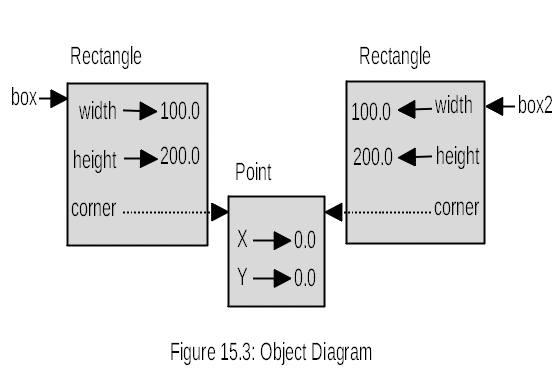
Figure 15.3 shows what the object diagram looks like. This operation is called a **shallow
copy** because it copies the object and any references it contains, but not the embedded
objects.

For most applications, this is not what you want. In this example, invoking
grow_rectangle on one of the Rectangles would not affect the other, but invoking
move_rectangle on either would affect both! This behavior is confusing and error-prone.

Fortunately, the copy module provides a method named deepcopy that copies not only the
object but also the objects it refers to, and the objects they refer to, and so on. You will not
be surprised to learn that this operation is called a **deep copy**.

In [ ]:
box3 = copy.deepcopy(box)
box3 is box

In [ ]:
box3.corner is box.corner

box3 and box are completely separate objects.

As an exercise, write a version of move_rectangle that creates and returns a new Rectangle
instead of modifying the old one.

### 15.7 Debugging

When you start working with objects, you are likely to encounter some new exceptions. If
you try to access an attribute that doesn’t exist, you get an AttributeError:

In [ ]:
p = Point()
p.x = 3
p.y = 4
p.z

If you are not sure what type an object is, you can ask:

In [ ]:
type(p)

You can also use isinstance to check whether an object is an instance of a class:

In [ ]:
 isinstance(p, Point)

If you are not sure whether an object has a particular attribute, you can use the built-in
function hasattr:

In [ ]:
hasattr(p, 'x')

In [ ]:
hasattr(p, 'z')

The first argument can be any object; the second argument is a string that contains the name
of the attribute.

You can also use a try statement to see if the object has the attributes you need:

In [ ]:
try:
    x = p.x
except AttributeError:
    x = 0
    
x

This approach can make it easier to write functions that work with different types; more
on that topic is coming up in Section 17.9.


### 15.8 Glossary

**class:** A programmer-defined type. A class definition creates a new class object.

**class object:** An object that contains information about a programmer-defined type. The
class object can be used to create instances of the type.

**instance:** An object that belongs to a class.

**instantiate:** To create a new object.

**attribute:** One of the named values associated with an object.

**embedded object:** An object that is stored as an attribute of another object.

**shallow copy:** To copy the contents of an object, including any references to embedded
objects; implemented by the copy function in the copy module.

**deep copy:** To copy the contents of an object as well as any embedded objects, and any
objects embedded in them, and so on; implemented by the deepcopy function in the
copy module.

**object diagram:** A diagram that shows objects, their attributes, and the values of the attributes.


### 15.9 Exercises

#### Exercise 15.1. 
Write a definition for a class named Circle with attributes center and radius,
where center is a Point object and radius is a number.

Instantiate a Circle object that represents a circle with its center at (150, 100) and radius 75.
Write a function named point_in_circle that takes a Circle and a Point and returns True if the
Point lies in or on the boundary of the circle.

Write a function named rect_in_circle that takes a Circle and a Rectangle and returns True if
the Rectangle lies entirely in or on the boundary of the circle.

Write a function named rect_circle_overlap that takes a Circle and a Rectangle and returns
True if any of the corners of the Rectangle fall inside the circle. Or as a more challenging version,
return True if any part of the Rectangle falls inside the circle.

Solution: http://thinkpython2.com/code/Circle.py .

#### Exercise 15.2. 
Write a function called draw_rect that takes a Turtle object and a Rectangle and
uses the Turtle to draw the Rectangle. See Chapter 4 for examples using Turtle objects.

Write a function called draw_circle that takes a Turtle and a Circle and draws the Circle.

Solution: http://thinkpython2.com/code/draw.py .

Source material from:

Think Python<br>
How to Think Like a Computer Scientist<br>
2nd Edition, Version 2.2.23<br>
Allen Downey<br>
Copyright © 2015 Allen Downey. <br>
<br>
Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


Adapted to Jupyter Notebooks with additional material by Warren Watts, Copyright © 2018